In [13]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from pylab import mpl
%matplotlib inline

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)

# 从硬盘读取数据进入内存
df = pd.read_excel("附件一：325个样本数据.xlsx")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Columns: 366 entries, 辛烷值RON to D101原料缓冲罐压力
dtypes: float64(366)
memory usage: 929.4 KB


In [15]:
#方差过滤

count = 0
column = []

for j in range(df.shape[1] - 1):
    if df.iloc[:,j + 1].std() < 0.1:
        column.append(j + 1)

#for i in column:
df.drop(labels = df.columns[column], axis= 1, inplace = True)


In [3]:
#标准化

for j in range(df.shape[1]):
    min = df.iloc[:,j].min()
    max = df.iloc[:,j].max()
    df.iloc[:,j] = (df.iloc[:,j]-min)/(max-min)

In [16]:
df.shape[1] - 1

316

In [18]:
def GRA_ONE(gray, m=0):
    # 标准化
    for j in range(gray.shape[1]):
        min_1 = gray.iloc[:,j].min()
        max_1 = gray.iloc[:,j].max()
        gray.iloc[:,j] = (gray.iloc[:,j]-min_1)/(max_1-min_1)
    
    std = gray.iloc[:, m]  # 为标准要素
    ce = gray.iloc[:, 1:]  # 为比较要素
    shape_n, shape_m = ce.shape[0], ce.shape[1]  # 计算行列

    # 与标准要素比较，相减
    a = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            a[i, j] = abs(ce.iloc[j, i] - std[j])

    # 取出矩阵中最大值与最小值
    c, d = amax(a), amin(a)

    # 计算值
    result = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            result[i, j] = (d + 0.5 * c) / (a[i, j] + 0.5 * c)

    # 求均值，得到灰色关联值,并返回
    result_list = [mean(result[i, :]) for i in range(shape_m)]
    result_list.insert(m,1)
    return pd.DataFrame(result_list)

df1 = GRA_ONE(df)

In [19]:
df1.sort_values(by = 0,ascending = False)

,0
0,1.000000
2,0.894134
36,0.796645
66,0.783962
62,0.782898
202,0.778340
27,0.774661
141,0.773598
277,0.767936
56,0.767918


In [20]:
df1[df1[0] > 0.75].index

Int64Index([  0,   1,   2,   6,  15,  27,  36,  39,  42,  45,  48,  51,  52,
             56,  57,  62,  63,  66,  69,  72,  74, 107, 123, 141, 149, 150,
            152, 153, 161, 162, 165, 190, 202, 203, 210, 211, 274, 277],
           dtype='int64')

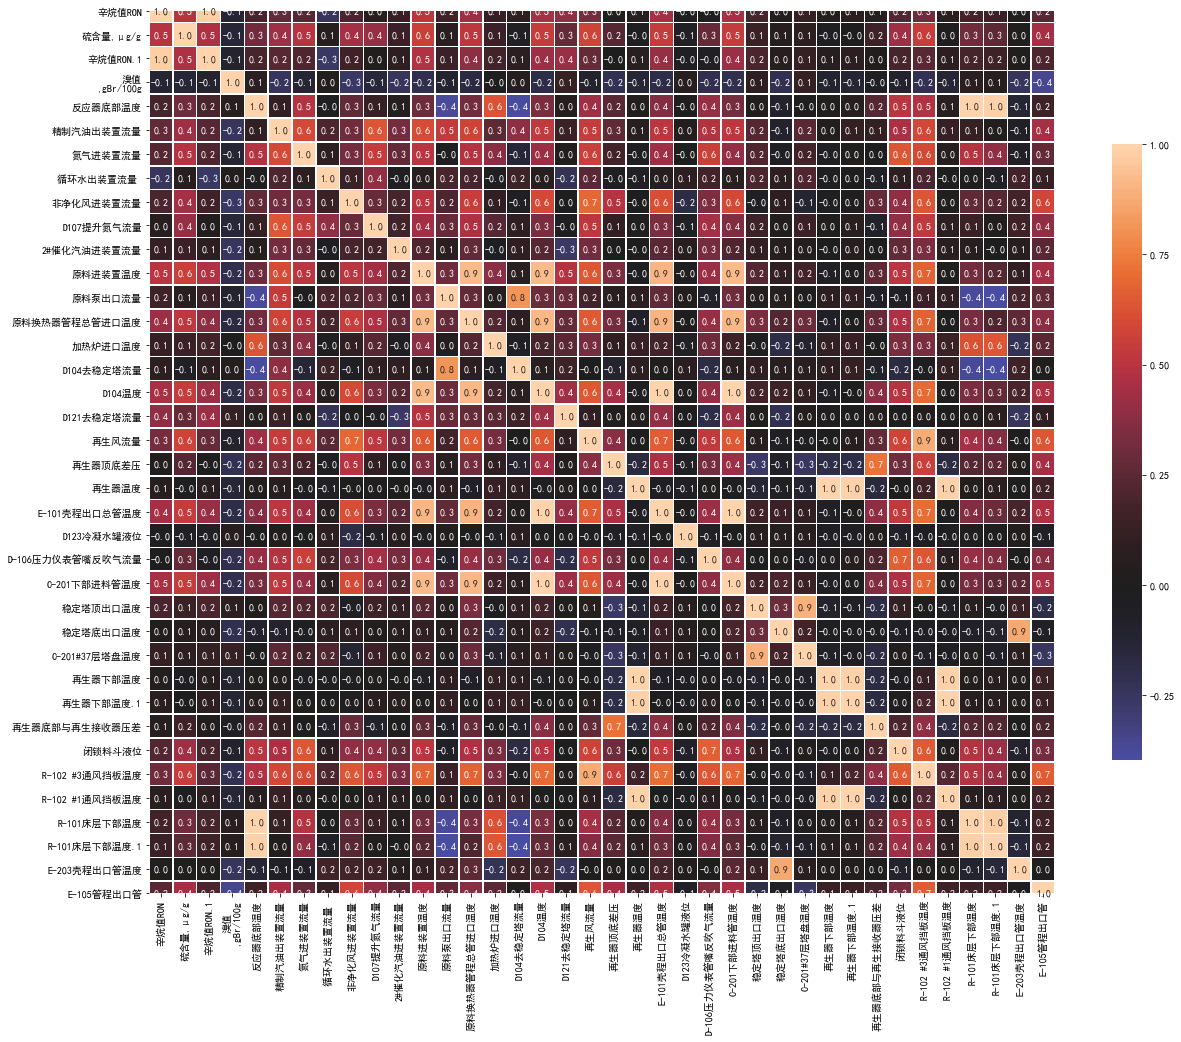

In [23]:
import seaborn as sns

plt.figure(figsize=(18,18))
sns.heatmap(df.iloc[:,df1[df1[0] > 0.75].index].corr(), center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='.1f')
plt.savefig("01.png")
plt.tight_layout()

In [22]:
df2 = df.iloc[:,df1[df1[0] > 0.7].index]
df2
#df2.to_excel("1.xlsx")

,辛烷值RON,"硫含量,μg/g",辛烷值RON.1,"烯烃,v%","芳烃,v%","溴值\n,gBr/100g","密度(20℃),\nkg/m³","S, wt%",反应器上部温度,反应器底部温度,稳定塔下部温度,干气出装置温度,精制汽油出装置流量,燃料气进装置温度,氮气进装置流量,循环水出装置流量,非净化风进装置流量,D107转剂线压差,D107提升氮气流量,催化汽油进装置总流量,2#催化汽油进装置流量,3#催化汽油进装置流量,原料进装置温度,原料泵出口流量,原料进装置流量,原料换热器管程总管进口温度,加热炉进口温度,加热炉排烟温度,加热炉循环氢出口温度,反应器入口温度,D104去稳定塔流量,D104温度,D121温度,D121去稳定塔流量,再生风流量,R102再生器提升氮气流量,再生器顶底差压,再生器顶烟气温度,再生器温度,D110顶底压差,0.1,0.4,0.7,0.9,产品汽油出装置流量,原料进装置流量累计,0.22,火炬气排放累计流量,E-101壳程出口总管温度,E-101D壳程出口管温度,E-101A壳程出口管温度,D-203燃料气进口管温度,D-203顶部出口管温度,D123冷凝水罐液位,D-122入口管温度,D-110底部,D-107温度,D-106压力仪表管嘴反吹气流量,D-106温度,D-102温度,C-201下部进料管温度,稳定塔顶出口温度,稳定塔底出口温度,C-201#37层塔盘温度,A-201出口总管温度,再生器下部温度,再生器下部温度.1,再生器接收器顶部/再生器接收器底部差压,再生器接收器/LH差压,再生器底部与再生接收器压差,再生进料罐/LH差压,预热器空气出口压力,TAG表和PID图未见PDI-2107点，是否为DI-2107,烟气出辐射室温度,烟气出对流室温度,还原器LH差压,反应器接收器LH差压,闭锁料斗液位,闭锁料斗顶压力,闭锁料斗充氢线压力控制,R-102底滑阀差压,R-102底滑阀,R-102底部锥段温度,R-102 #3通风挡板温度,R-102 #1通风挡板温度,R-101上部床层压降,R-101顶反应产物出口管温度,R-101底格栅上下压差,R-101床层中部温度,R-101床层下部温度,R-101床层下部温度.1,ME-103反吹气总管压力,K-102A排气温度,F-101出口支管#4温度,F-101出口支管#3温度,F-101出口支管#2温度,F-101出口支管#1温度,EH-103加热元件温度,EH-103加热元件温度.1,EH-103出口总管,E-205管程入口管温度,E-203壳程出口管温度,E-105管程出口管,E-101壳程入口总管温度,过滤器ME-101出口温度,E-101壳程入口总管温度.1,再生器藏量
0,0.774436,0.391045,0.828125,0.488291,0.624510,0.859416,0.465496,0.383465,0.572077,0.586530,0.878192,0.502919,0.327254,0.511414,0.374827,0.489775,0.243514,0.190584,0.001786,0.712922,0.672193,0.756683,0.506951,0.683884,0.672887,0.351930,0.542529,0.862495,0.746072,0.730362,0.872201,0.464047,0.337432,0.854760,0.102316,0.547810,0.666637,0.013262,0.584337,0.705791,0.833946,0.617193,0.592449,0.568750,0.747557,0.604005,1.000000,0.574546,0.448729,0.842778,0.233843,0.498726,0.350113,0.540811,0.229024,0.125057,0.440782,0.311400,0.787176,0.292782,0.478484,0.787540,0.839993,0.692608,0.721144,0.574348,0.567764,0.725065,0.204018,0.669252,0.184096,0.753732,0.681915,0.833929,0.930162,0.227186,0.242332,0.252332,0.781429,0.780863,0.555702,0.368655,0.818115,0.295299,0.557042,0.682054,0.557681,0.481340,0.587752,0.599102,0.597247,0.139075,0.550300,0.838311,0.711636,0.575173,0.724176,0.319350,0.329000,0.325527,0.457450,0.652582,0.001888,0.610148,0.655978,0.552165,0.338413
1,0.793233,0.334328,0.812500,0.587942,0.519608,0.865544,0.686441,0.386983,0.333864,0.355716,0.878312,0.493538,0.315933,0.609508,0.328243,0.497516,0.286595,0.308432,0.000047,0.712581,0.633570,0.777246,0.523635,0.686273,0.675373,0.382184,0.373819,0.853999,0.656487,0.499983,0.880250,0.485850,0.242167,0.793584,0.149118,0.548840,0.645318,0.043875,0.403640,0.644938,0.908841,0.612953,0.589051,0.565111,0.700734,0.600023,0.994058,0.568719,0.456026,0.854438,0.236233,0.609413,0.440972,0.637528,0.116195,0.169522,0.390380,0.383777,0.625495,0.410115,0.503614,0.813588,0.803541,0.734902,0.624844,0.382638,0.381279,0.673305,0.250455,0.688410,0.235094,0.731781,0.688687,0.785794,0.777160,0.274210,0.281171,0.252203,0.747797,0.733680,0.593239,0.444176,0.903799,0.353094,0.363933,0.688671,0.256521,0.465512,0.346629,0.360643,0.348787,0.273285,0.678910,0.596949,0.474764,0.385803,0.480309,0.333221,0.340454,0.405887,0.568189,0.652582,0.083475,0.610148,0.655978,0.263254,0.329905
2,0.793233,0.358209,0.843750,0.583671,0.528011,0.863092,0.615012,0.380827,0.528185,0.485894,0.868027,0.438573,0.333198,0.523249,0.329176,0.509312,0.294954,0.218445,0.000000,0.715621,0.642566,0.772464,0.508228,0.682907,0.672175,0.319265,0.500261,0.858820,0.563762,0.497638,0.892383,0.452403,0.021908,0.814121,0.243353,0.548176,0.584658,0.231265,0.898115,0.757366,0.853399,0.611353,0.587796,0.563693,0.764623,0.598430,0.991668,0.566361,0.440516,0.836588,0.230163,0.520363,0.366972,0.544316,0.130929,0.240875,0.477724,0.334736,0.801734,0.305166,0.477699,0.727354,0.817419,0.744647,0.381171,0.899782,0.903600,0.792109,0.264138,0.637852,0.244211,0.776638,0.684742,0.707961,0.748668,0.290724,0.301207,0.344799,0.712090,0.721445,0.587519,0.501595,0.972953,0.473015,0.896237,0.685124,0.495952,0.471333,0.486826,0.491090,0.486659,0.363069,0.570822,0.582441,0.451374,0.378759,0.481497,0.316549,0.324704,0.412705,0.543509,